In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()


In [2]:
print('Target variables  : ', dataset['target_names'])

(unique, counts) = np.unique(dataset['target'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Target variables  :  ['malignant' 'benign']
Unique values of the target variable [0 1]
Counts of the target variable : [212 357]


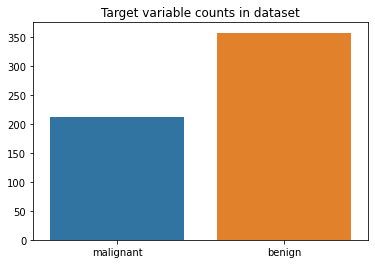

In [3]:
sns.barplot(x=dataset['target_names'], y=counts)
plt.title('Target variable counts in dataset')
plt.show()

In [6]:
X = dataset['data']
y = dataset['target']

In [7]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
predictions = model.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  88
False Positive(FP) =  3
True Negative(TN)  =  50
False Negative(FN) =  2
Accuracy of the binary classification = 0.965


In [12]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()


In [15]:
# Neural Networks

In [22]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=30))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [23]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
5/5 [==============================] - 2s 40ms/step - loss: 0.4963 - accuracy: 0.8873 - val_loss: 0.3877 - val_accuracy: 0.9091
Epoch 2/10
5/5 [==============================] - 0s 13ms/step - loss: 0.3544 - accuracy: 0.9413 - val_loss: 0.2924 - val_accuracy: 0.9091
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 0.2686 - accuracy: 0.9507 - val_loss: 0.2355 - val_accuracy: 0.9231
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 0.2139 - accuracy: 0.9601 - val_loss: 0.2003 - val_accuracy: 0.9231
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 0.1795 - accuracy: 0.9648 - val_loss: 0.1781 - val_accuracy: 0.9301
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: 0.1563 - accuracy: 0.9648 - val_loss: 0.1630 - val_accuracy: 0.9301
Epoch 7/10
5/5 [==============================] - 0s 12ms/step - loss: 0.1407 - accuracy: 0.9624 - val_loss: 0.1515 - val_accuracy: 0.9371
Epoch 8/10
5/5 [===========

[]

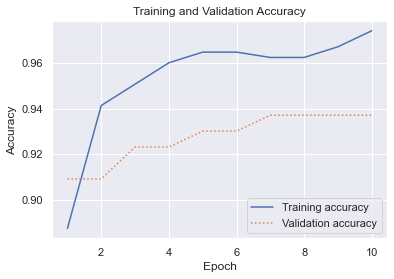

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [47]:
accu_net=hist.history['accuracy'][-1]


A typical accuracy score computed by divding the sum of the true positives and true negatives by the number of test samples isn't very helpful because the dataset is so imbalanced. Use a confusion matrix to visualize how the model performs during testing.

Text(89.133125, 0.5, 'Actual label')

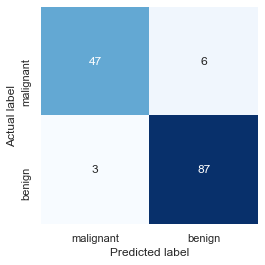

In [25]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['malignant', 'benign']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [28]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.965035,0.977778,0.967033
Support Vector Machines,0.944056,0.944444,0.965909
Decision Trees,0.902098,0.866667,0.975000
Random Forest,0.972028,0.977778,0.977778
Naive Bayes,0.916084,0.933333,0.933333
K-Nearest Neighbor,0.951049,0.988889,0.936842


In [ ]:
append

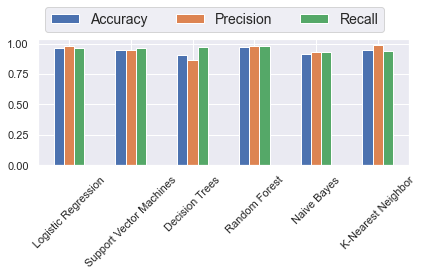

In [53]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()